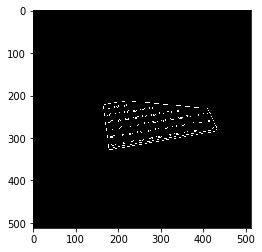

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
import math

%matplotlib inline


img0 = cv2.imread('wing2.png',0)
img = cv2.imread('/Users/will/projects/legoproj/data_oneofeach/studs_oneofeach/4_studs_a.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)


edged = cv2.Canny(gray, 30, 200)
'''
cv2.imshow('Edges', edged)
if cv2.waitKey(0) & 0xff == 27:
   cv2.destroyAllWindows()
'''
plt.imshow(edged,cmap='gray')
plt.show()

kernel = np.ones((2,2), np.uint8) 
edged = cv2.dilate(edged, kernel, iterations=1) 


cv2.imshow('Dilated', edged)
'''
if cv2.waitKey(0) & 0xff == 27:
   cv2.destroyAllWindows()
'''

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


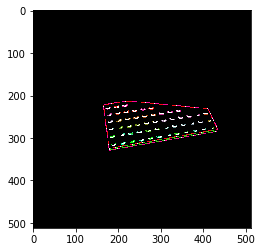

Found contour of length: 33.3137081861496
Found contour of length: 28.485281109809875
Found contour of length: 29.071067690849304
Found contour of length: 28.727921843528748
Found contour of length: 29.899494767189026
Found contour of length: 31.313708305358887
Found contour of length: 31.313708186149597
Found contour of length: 19.656854152679443
Found contour of length: 5.656854152679443
Found contour of length: 27.899494647979736
Found contour of length: 32.72792184352875
Found contour of length: 32.72792172431946
Found contour of length: 23.656854152679443
Found contour of length: 33.31370830535889
Found contour of length: 543.5218590497971
Found contour of length: 24.485281229019165
Found contour of length: 32.14213538169861
Found contour of length: 23.656854152679443
Found contour of length: 32.14213538169861
Found contour of length: 28.72792160511017
Found contour of length: 17.656854152679443
Found contour of length: 21.071067690849304
Found contour of length: 23.89949464797973

In [3]:
img1 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)

num = len(contours)

for i in range(num):
    one = math.floor(i/num * 255)
    other = 255 - one
    b = 150 if i % 2 else 20
    cv2.drawContours(img1, contours, i, (one, other, b), 1)

 
plt.imshow(img1)
plt.show()

for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    print("Found contour of length: " + str(perimeter))

In [6]:
t = contours[-1]


In [7]:
t

array([[[217, 213]],

       [[216, 214]],

       [[210, 214]],

       [[209, 215]],

       [[204, 215]],

       [[203, 216]],

       [[197, 216]],

       [[196, 217]],

       [[190, 217]],

       [[189, 218]],

       [[184, 218]],

       [[183, 219]],

       [[177, 219]],

       [[176, 220]],

       [[171, 220]],

       [[170, 221]],

       [[166, 221]],

       [[165, 222]],

       [[164, 222]],

       [[164, 226]],

       [[165, 227]],

       [[165, 233]],

       [[166, 234]],

       [[166, 241]],

       [[167, 242]],

       [[167, 248]],

       [[168, 249]],

       [[168, 256]],

       [[169, 257]],

       [[169, 263]],

       [[170, 264]],

       [[170, 271]],

       [[171, 272]],

       [[171, 278]],

       [[172, 279]],

       [[172, 285]],

       [[173, 286]],

       [[173, 293]],

       [[174, 294]],

       [[174, 300]],

       [[175, 301]],

       [[175, 308]],

       [[176, 309]],

       [[176, 315]],

       [[177, 316]],

       [[1

In [30]:
approx = cv2.approxPolyDP(t,0.01*cv2.arcLength(t,True),True)

In [31]:
approx

array([[[164, 222]],

       [[179, 329]],

       [[433, 282]],

       [[409, 230]],

       [[232, 213]]], dtype=int32)

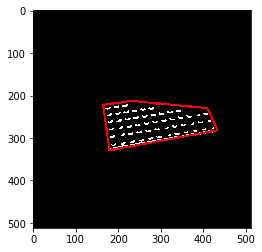

In [32]:
img2 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)
cv2.drawContours(img2, [approx], 0, (255, 0, 0), 3)

plt.imshow(img2)
plt.show()